In [107]:
import pandas as pd

athletes = pd.read_csv('data/athlete_events.csv')
# Count how many unique occurences of countries and sports are there
print(f"# of countires: {len(athletes['NOC'].unique())}")
print(f"# of sports: {len(athletes['Sport'].unique())}")
print(f"# of events: {len(athletes['Event'].unique())}")
print(f"# of athletes: {len(athletes['Name'].unique())}")
athletes.head()

# of countires: 230
# of sports: 66
# of events: 765
# of athletes: 134732


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [114]:
columns_of_interest = ['Height', 'Weight','Age']
aggregations = ['min', 'max']
for sex in ['M', 'F']:
    extrema_by_sport = pd.DataFrame(index=athletes['Sport'].unique())
    extrema_by_sport.sort_index(inplace=True)
    for column in columns_of_interest:
        by_sex = athletes[athletes['Sex'] == sex]
        no_nans = by_sex.dropna(subset=column)
        for aggregation in aggregations:
            new_column_name = column + '_' + aggregation
            extrema_by_sport[new_column_name] = no_nans.groupby(['Sport']).agg({column:aggregation})
    extrema_by_sport.to_csv('data/extrema_' + sex + '.csv', index=True, header=True)

In [115]:
extrema_male = pd.read_csv('data/extrema_M.csv', index_col=[0])
extrema_female = pd.read_csv('data/extrema_F.csv', index_col=[0])
extrema_male.head()

,Height_min,Height_max,Weight_min,Weight_max,Age_min,Age_max
Aeronautics,NaN,NaN,NaN,NaN,26.0,26.0
Alpine Skiing,142.0,200.0,50.0,107.0,14.0,55.0
Alpinism,NaN,NaN,NaN,NaN,22.0,57.0
Archery,157.0,197.0,46.0,130.0,15.0,71.0
Art Competitions,150.0,190.0,59.0,93.0,14.0,97.0


In [234]:
extrema_female.head()

,Height_min,Height_max,Weight_min,Weight_max,Age_min,Age_max
Aeronautics,NaN,NaN,NaN,NaN,NaN,NaN
Alpine Skiing,152.0,187.0,45.0,90.0,14.0,45.0
Alpinism,NaN,NaN,NaN,NaN,43.0,43.0
Archery,152.0,185.0,42.0,95.0,14.0,63.0
Art Competitions,160.0,160.0,NaN,NaN,17.0,74.0


In [235]:
data_for_plots = {'Height': [], 'Weight': [], 'Age': []}
for extrema in [extrema_female, extrema_male]:
    for column in extrema.columns:
        feature, aggregation = column.split('_')
        if aggregation == 'min':
            extreme_value = extrema[column].min(skipna=True)
        else:
            extreme_value = extrema[column].max(skipna=True)
        sport = extrema[extrema[column] == extreme_value].index[0]
        data_for_plots[feature].append((sport, extreme_value))
data_for_plots

{'Height': [('Gymnastics', 127.0),
  ('Basketball', 213.0),
  ('Boxing', 127.0),
  ('Basketball', 226.0)],
 'Weight': [('Gymnastics', 25.0),
  ('Weightlifting', 167.0),
  ('Football', 28.0),
  ('Judo', 214.0)],
 'Age': [('Figure Skating', 11.0),
  ('Art Competitions', 74.0),
  ('Gymnastics', 10.0),
  ('Art Competitions', 97.0)]}

In [236]:
female = data_for_plots['Height'][:2]
male = data_for_plots['Height'][-2:]
print(f"Female data: {female}")
print(f"Male data: {male}")

Female data: [('Gymnastics', 127.0), ('Basketball', 213.0)]
Male data: [('Boxing', 127.0), ('Basketball', 226.0)]


In [237]:
sports_female, data_female = zip(*female)
sports_male, data_male = zip(*male)
labels = sports_male + sports_female
labels

('Boxing', 'Basketball', 'Gymnastics', 'Basketball')

Boxing
Basketball
Gymnastics
Basketball


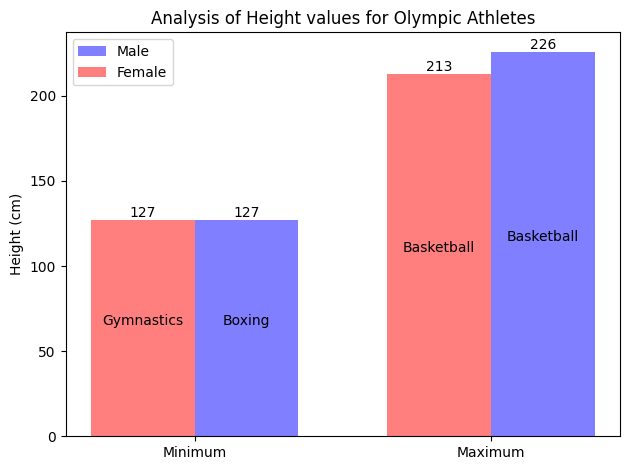

In [238]:
import matplotlib.pyplot as plt
import numpy as np

opacity = 0.5
bar_width = 0.35

bar1 = plt.bar(np.arange(len(data_male)) + bar_width, data_male, bar_width, align='center', alpha=opacity, color='b', label='Male')
bar2 = plt.bar(range(len(data_female)), data_female, bar_width, align='center', alpha=opacity, color='r', label='Female')

# Add the sports for each bar and the height
for rect, label in zip(bar1 + bar2, labels):
    print(label)
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() /2.0, height / 2.0, label, ha='center', va='bottom')
    plt.text(rect.get_x() + rect.get_width() /2.0, height, f'{height:.0f}', ha='center', va='bottom')


plt.legend()
plt.ylabel('Height (cm)')
plt.title('Analysis of Height values for Olympic Athletes')
plt.xticks([bar_width/2.0, 1 + bar_width/2.0],('Minimum', 'Maximum'))
plt.tight_layout()
plt.show()

In [242]:
# Check values
athletes[athletes['Height'] == 127.0]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
29333,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,NaN
29334,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Team All-Around,NaN
29335,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,NaN
29336,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,NaN
29337,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Uneven Bars,NaN
29338,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Balance Beam,NaN
164821,82769,Lyton Levison Mphande,M,25.0,127.0,62.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN
